In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

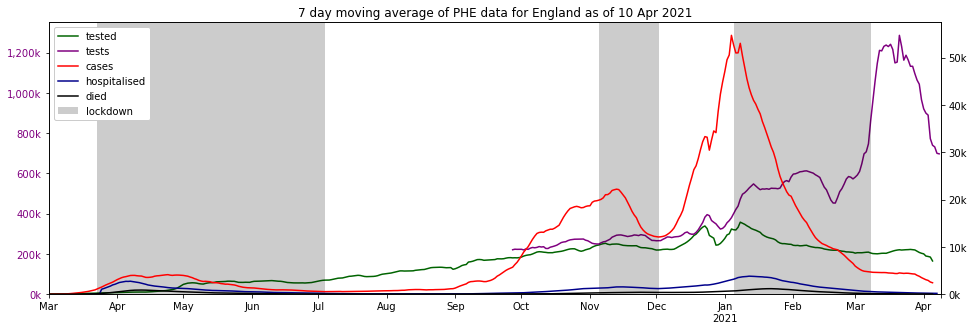

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

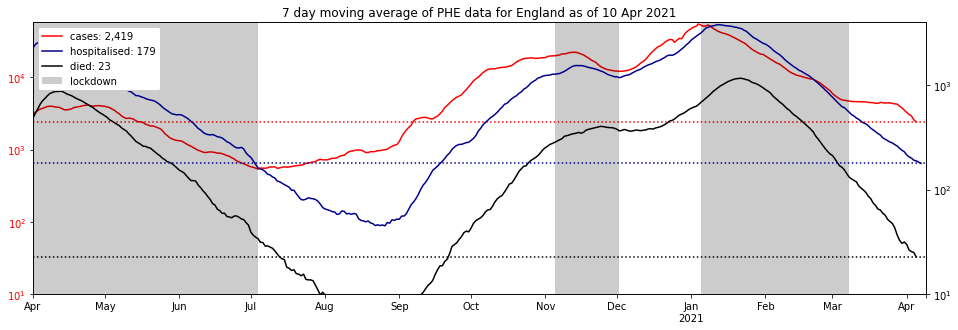

In [3]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

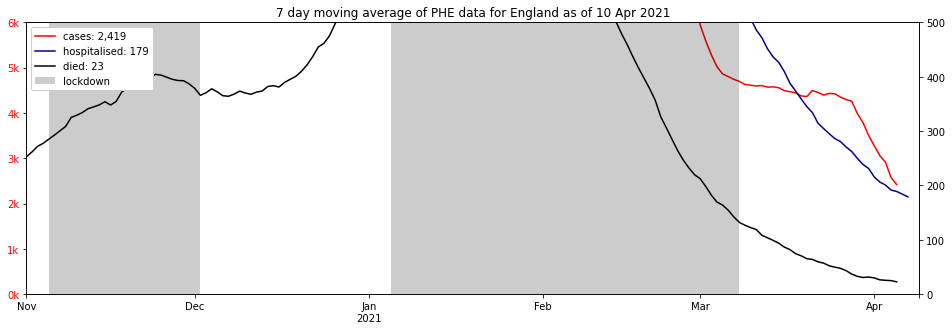

In [4]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=6_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=500)

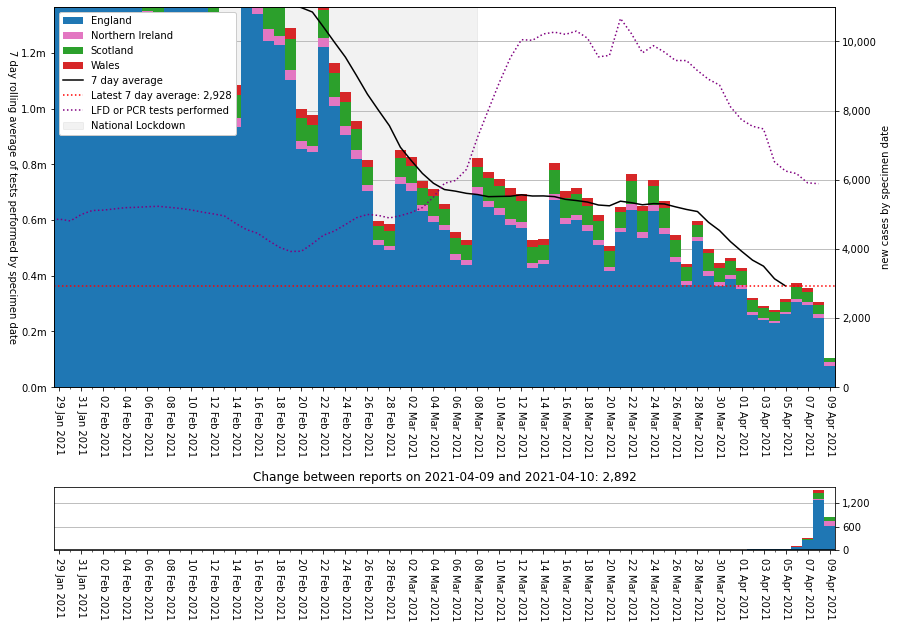

In [5]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,5740436.0,26996936.0,21256500.0,56286961,10.198518,37.764519,52.036963
1,Northern Ireland,N92000002,189697.0,813468.0,623771.0,1893667,10.017442,32.939846,57.042711
2,Scotland,S92000003,551699.0,2643524.0,2091825.0,5463300,10.098274,38.288672,51.613054
3,Wales,W92000004,509478.0,1556316.0,1046838.0,3152879,16.159136,33.202606,50.638258


'partial: 32,010,244 (47.9%), full: 6,991,310'

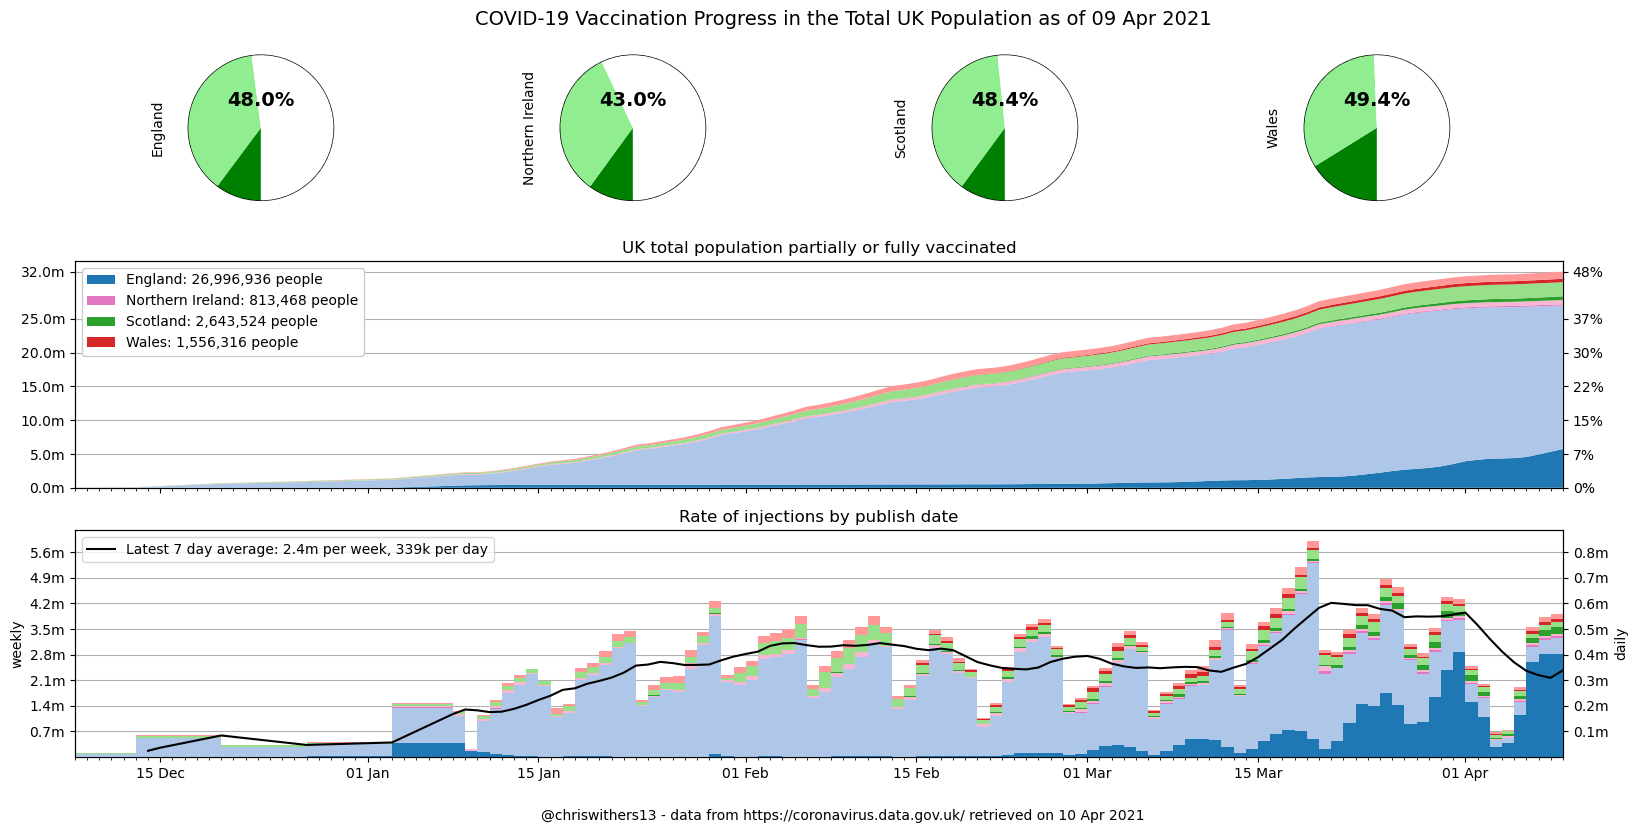

In [6]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [7]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,09 Apr 21,"+62,274","+404,206","+404,206","+26,996,936","+5,740,436","+5,740,436"
Northern Ireland,09 Apr 21,"+7,463","+7,883","+7,883","+813,468","+189,697","+189,697"
Scotland,09 Apr 21,"+17,947","+26,887","+26,887","+2,643,524","+551,699","+551,699"
Wales,09 Apr 21,"+19,194","+11,160","+11,160","+1,556,316","+509,478","+509,478"


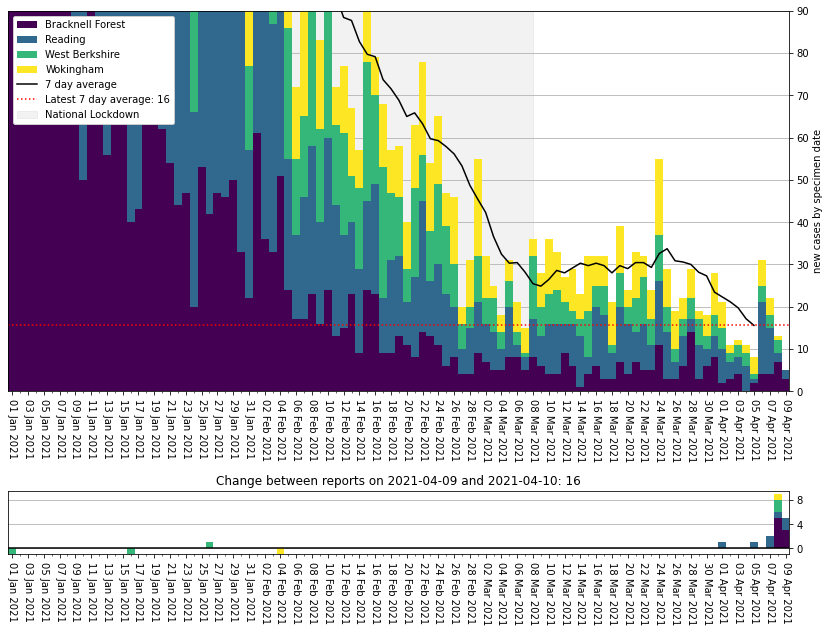

In [8]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=90)

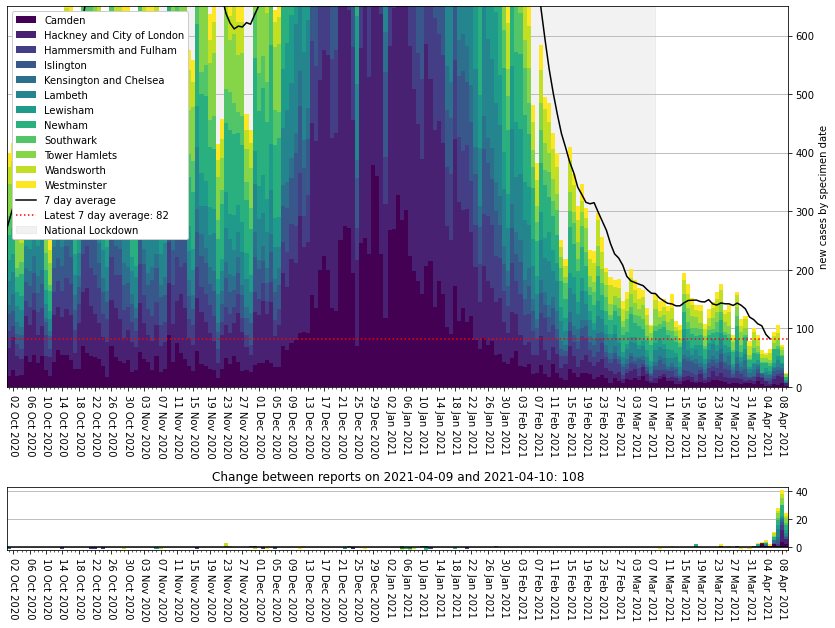

In [9]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000005,Clackmannanshire,100.892511,52.0,2021-04-09
E07000150,Corby,92.774655,67.0,2021-04-09
E07000174,Mansfield,92.395232,101.0,2021-04-09
E08000016,Barnsley,80.205456,198.0,2021-04-09
E08000032,Bradford,74.104814,400.0,2021-04-09
E08000036,Wakefield,72.348929,252.0,2021-04-09
E07000156,Wellingborough,71.511912,57.0,2021-04-09
E08000017,Doncaster,70.537690,220.0,2021-04-09
N09000005,Derry City and Strabane,68.083869,103.0,2021-04-09


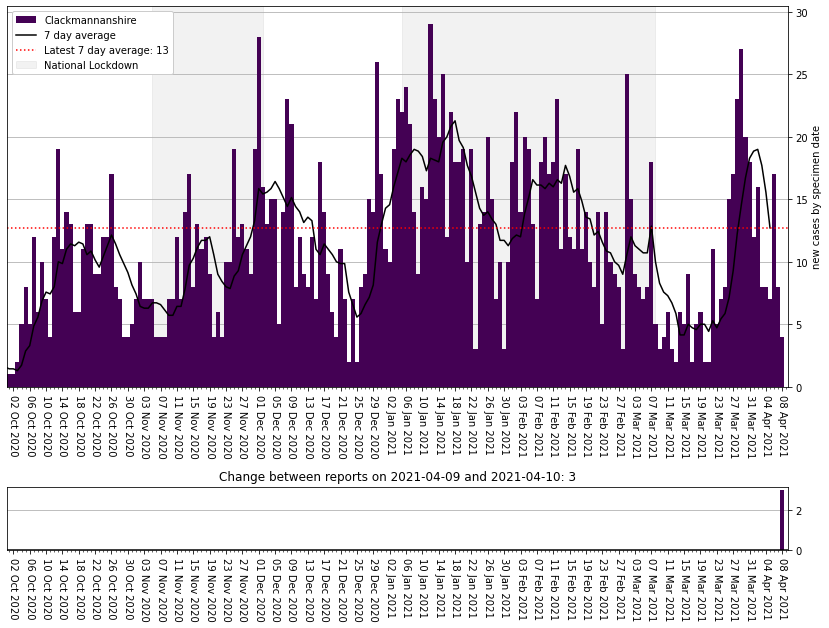

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,55.097530,437.0,2021-04-09
E08000032,Bradford,74.104814,400.0,2021-04-09
S12000049,Glasgow City,55.597675,352.0,2021-04-09
E08000019,Sheffield,58.476232,342.0,2021-04-09
E08000025,Birmingham,23.909281,273.0,2021-04-09
E08000034,Kirklees,61.393356,270.0,2021-04-09
E08000036,Wakefield,72.348929,252.0,2021-04-09
E06000016,Leicester,63.801436,226.0,2021-04-09
E08000003,Manchester,39.974098,221.0,2021-04-09


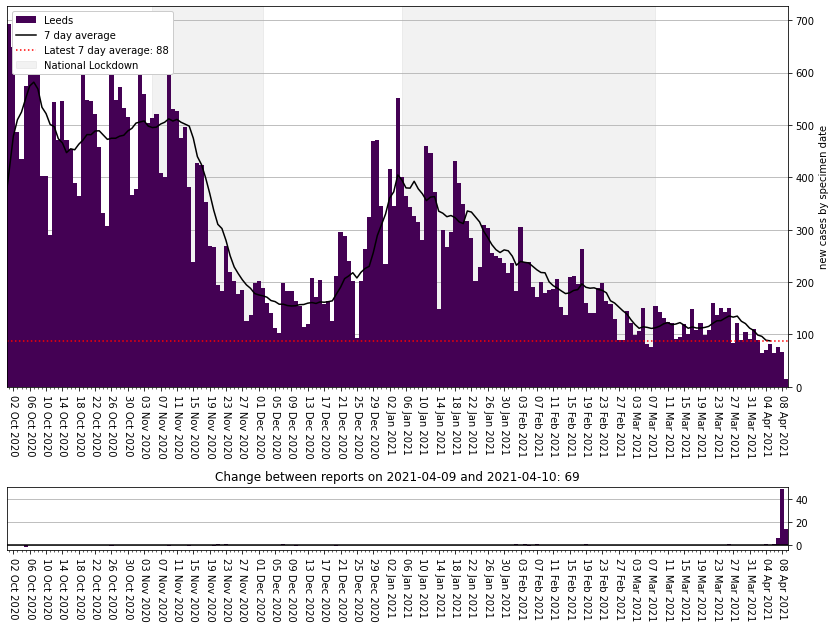

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [15]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.18

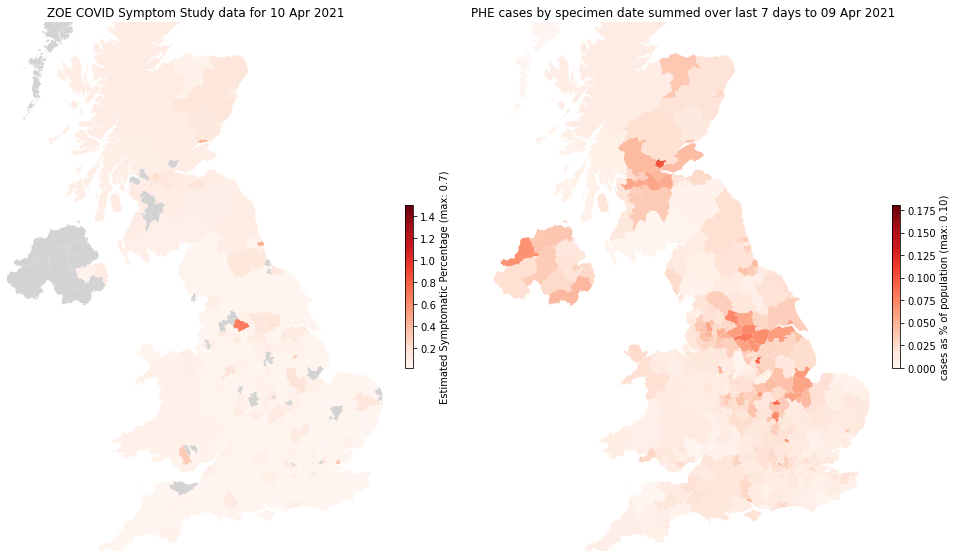

In [16]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [17]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...